# Exercise 4 

In [1]:
import math
import numpy as np
import pandas as pd
from typing import Callable
from matplotlib import pyplot as plt

In [2]:
### Generate dataset for specific dimension
def generate_data(d = 5, n=100):

    #create empty data frame
    df = pd.DataFrame()
    # 100 element array with uniform distribution between [0, 1]
    input_feature = np.random.uniform(size=[100, d])

    df = pd.DataFrame(input_feature, columns=[f'feature_{x}' for x in range(d)])
    return df

In [3]:
### Calculate lp norm distance between two points
def lp_norm(p, v1, v2):
    sumOfFeatures = 0
    for i in range(0, len(v1)):
        sumOfFeatures += abs((v2[i] - v1[i])) ** p
    l2_value = sumOfFeatures ** (1 / p)
    return l2_value

In [5]:
### Calculate contrast value
def contrastValue(dMax,dMin):
    return (dMax -dMin)/ dMin

In [6]:
def get_values(dim: int, n: int, generator: Callable, p_value: int):
    """Generate samples and compute statistics

    Args:
        dim (int): Number of dimensions/features
        n (int): Number of samples
        generator (Callable): Function that generates the samples
        p_value (int): p value of lp-norm, e.g. 2 is used for l2-norm
    """
    points = generator(dim, n).to_numpy()
    min_sum = 0
    max_sum = 0
    avg_sum = 0
    diff_sum = 0
    cont_sum = 0
    for i, p1 in enumerate(points):
        distances = []
        for j, p2 in enumerate(points):
            if i == j:
                continue
            # TODO: substitute l2-norm to lp-norm
            distances.append(lp_norm(p_value, p1, p2))
        minimum = np.min(distances)
        maximum = np.max(distances)
        min_sum += minimum
        max_sum += maximum
        avg_sum += np.mean(distances)
        diff_sum += maximum - minimum
        cont_sum += contrastValue(maximum, minimum)
    avg_min = min_sum/n
    avg_max = max_sum/n
    avg_avg = avg_sum/n
    avg_diff = diff_sum/n
    avg_cont = cont_sum/n
    return pd.DataFrame([[avg_min, avg_max, avg_avg, avg_diff, avg_cont]], columns=['min', 'max', 'avg', 'diff', 'cont'])

print(get_values(3, 100, generate_data, 2))

        min       max       avg      diff      cont
0  0.121116  1.083719  0.618479  0.962602  9.708098


In [7]:
# set dimensions
dims = [1,2,3,4,5,10,20,30,40,50,60,70,80,90,100]

# set distance measures
p_values = [0.5, 1, 2, 3]

             min          max          avg         diff
dim                                                    
1       0.005360     0.754937     0.347391     0.749576
2       0.110521     2.763535     1.237956     2.653013
3       0.470000     5.833301     2.781581     5.363301
4       1.131426     9.636646     4.749710     8.505219
5       2.104479    13.874491     7.363006    11.770012
10     13.416905    49.742980    29.733352    36.326075
20     68.255563   172.933687   116.809488   104.678125
30    167.412384   350.688600   252.349573   183.276216
40    316.656647   602.358311   453.026225   285.701664
50    518.211447   909.336700   704.672276   391.125253
60    769.418840  1297.031281  1019.355707   527.612441
70   1080.107345  1737.654896  1398.980793   657.547550
80   1436.422226  2295.172721  1840.462955   858.750495
90   1833.582134  2801.550147  2309.095187   967.968012
100  2317.267556  3461.510165  2865.775941  1144.242610


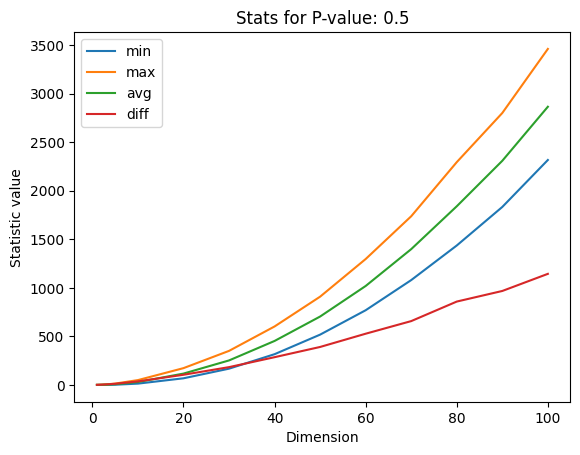

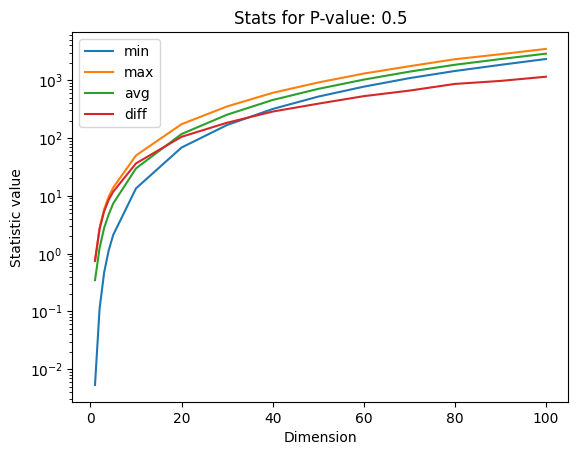

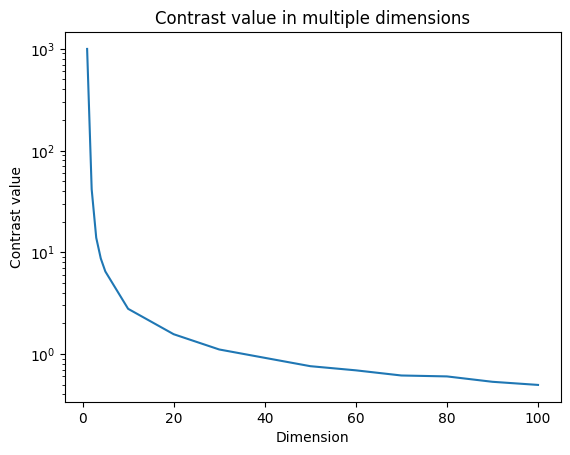

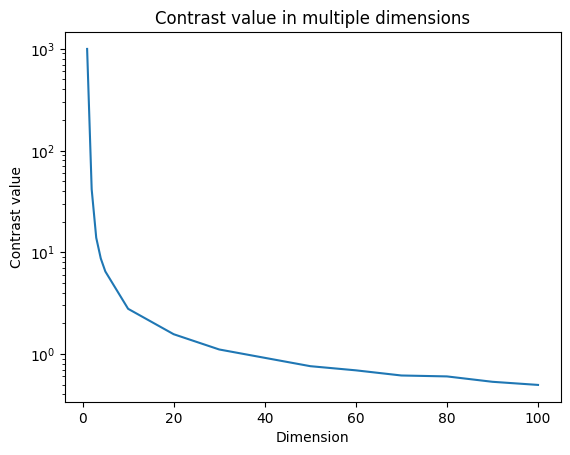

           min        max        avg       diff
dim                                            
1     0.005114   0.712466   0.320801   0.707351
2     0.069686   1.419974   0.698100   1.350287
3     0.191184   1.932027   1.015511   1.740843
4     0.372553   2.507031   1.363839   2.134479
5     0.566834   2.950520   1.702937   2.383687
10    1.667266   5.214265   3.377318   3.546999
20    4.250620   9.009230   6.618387   4.758610
30    7.045676  13.126874   9.965840   6.081198
40    9.758296  16.892469  13.236117   7.134173
50   13.011994  21.095228  16.919153   8.083234
60   15.708780  24.253998  19.955048   8.545219
70   18.713831  28.143463  23.342025   9.429632
80   21.806061  31.950760  26.852907  10.144698
90   24.690830  35.099043  29.799321  10.408213
100  27.716431  38.838456  33.247584  11.122024


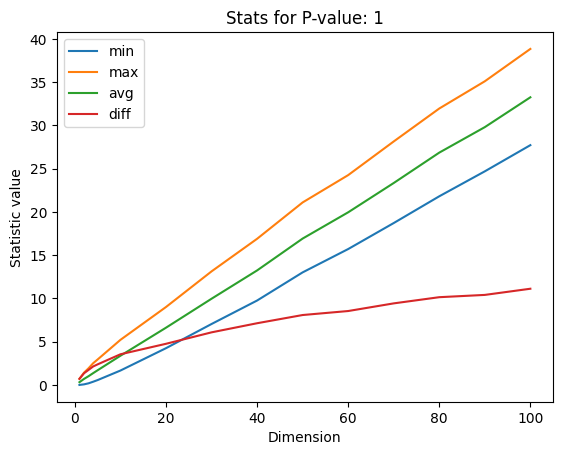

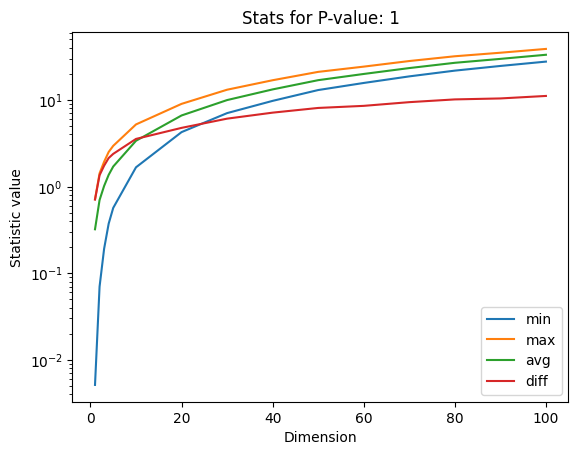

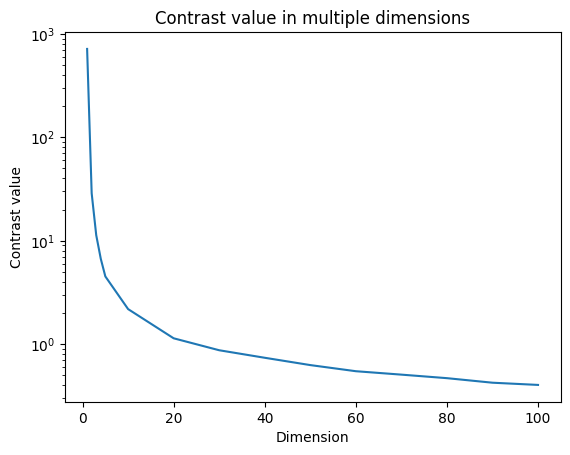

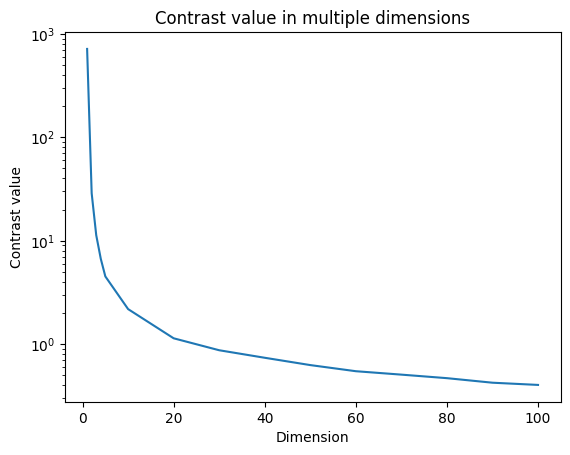

          min       max       avg      diff
dim                                        
1    0.004293  0.748508  0.335254  0.744216
2    0.051820  1.006667  0.513722  0.954847
3    0.120998  1.114323  0.625688  0.993325
4    0.219667  1.298107  0.774201  1.078439
5    0.287185  1.362273  0.870731  1.075088
10   0.663986  1.737536  1.243469  1.073549
20   1.223018  2.351468  1.814365  1.128449
30   1.641146  2.712333  2.201759  1.071187
40   1.984234  3.126015  2.577779  1.141781
50   2.284865  3.430254  2.874693  1.145389
60   2.569561  3.658275  3.128036  1.088714
70   2.867293  3.974043  3.442864  1.106751
80   3.076890  4.181266  3.642434  1.104376
90   3.283716  4.435200  3.849505  1.151484
100  3.454121  4.566614  4.031794  1.112492


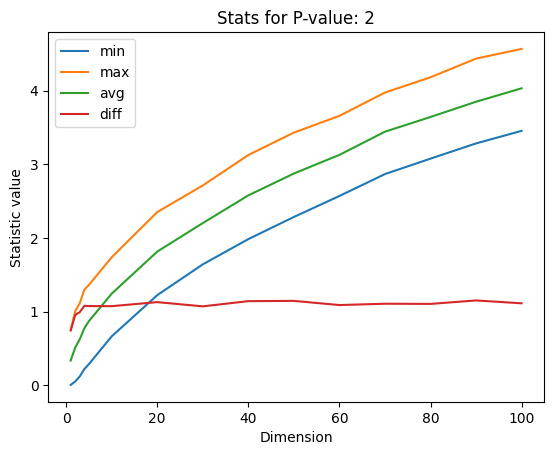

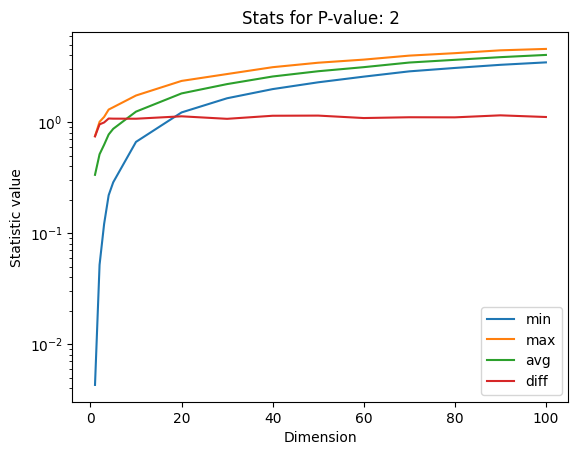

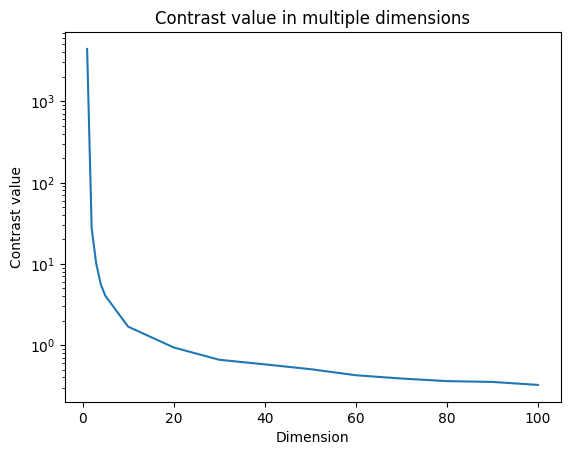

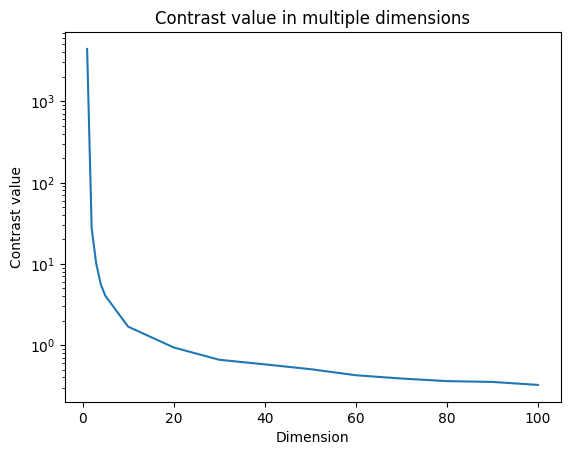

          min       max       avg      diff
dim                                        
1    0.004567  0.748606  0.345080  0.744039
2    0.048698  0.882747  0.485662  0.834050
3    0.115779  0.985424  0.601795  0.869644
4    0.187263  1.053776  0.687269  0.866513
5    0.267837  1.118062  0.739605  0.850225
10   0.514962  1.310830  0.965238  0.795868
20   0.848282  1.530559  1.217897  0.682277
30   1.056958  1.702808  1.409166  0.645849
40   1.237172  1.858341  1.566684  0.621169
50   1.365864  1.977995  1.699229  0.612131
60   1.505513  2.089025  1.816252  0.583512
70   1.620391  2.188513  1.917063  0.568122
80   1.680054  2.254358  1.984414  0.574304
90   1.779078  2.319199  2.068556  0.540121
100  1.861341  2.423048  2.155183  0.561707


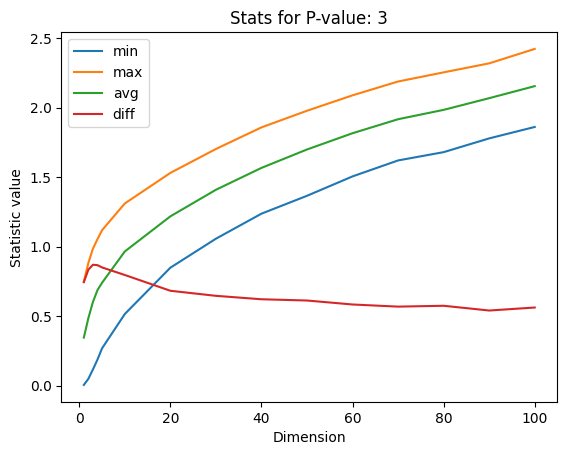

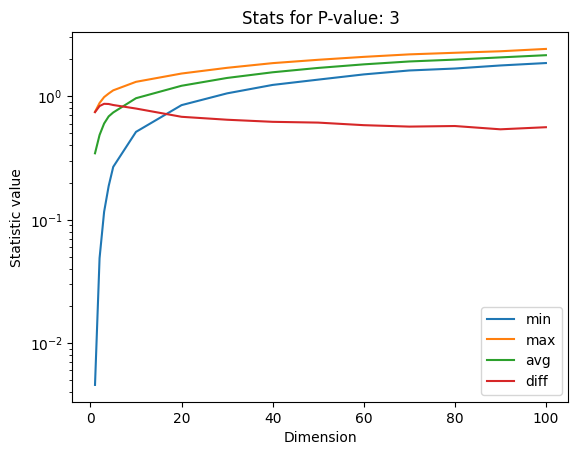

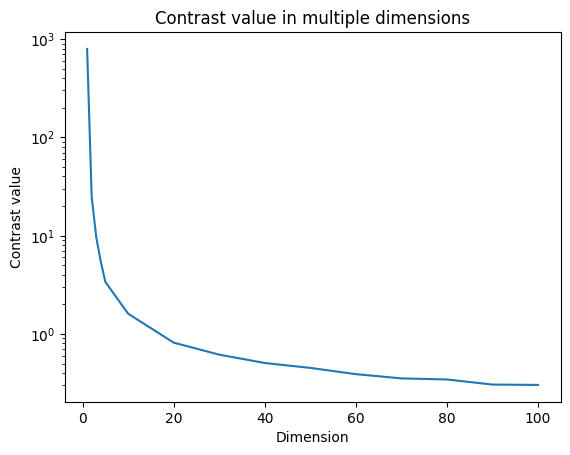

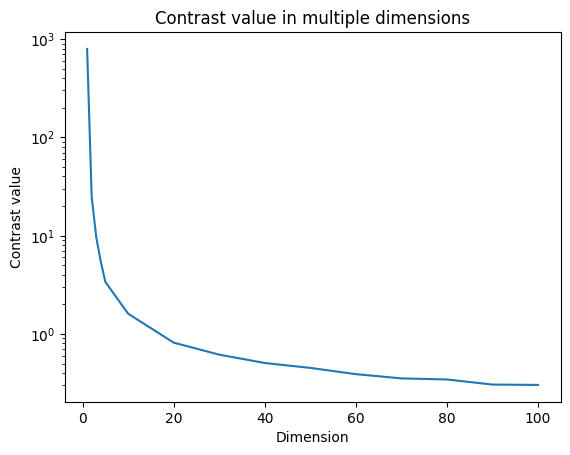

In [18]:
def plot_average_values(data: pd.DataFrame, yscale: str):
    """
    Args:
        data (pd.DataFrame): Input dataframe
        yscale (str, optional): y-scale value like ["linear", "log"]
    """
    plt.plot(data[["min", "max", "avg", "diff"]])
    plt.title(f"Stats for P-value: {p_value}")
    plt.xlabel("Dimension")
    plt.ylabel("Statistic value")
    plt.yscale(yscale)
    plt.legend(["min", "max", "avg", "diff"])
    plt.show()

def plot_contrast_value(data: pd.DataFrame, yscale: str):
    plt.plot(data[["cont"]])
    plt.title("Contrast value in multiple dimensions")
    plt.xlabel("Dimension")
    plt.ylabel("Contrast value")
    plt.yscale("log")
    plt.show()

# iterate over every measure and every dimension
for p_value in p_values:
    data = pd.DataFrame()
    for dim in dims:
        df = get_values(dim, 100, generate_data, p_value)
        df["dim"] = dim
        data = pd.concat([data, df], sort=False)
    # data = data.reset_index().drop('index', axis=1)
    data = data.set_index("dim")
    print(data[["min", "max", "avg", "diff"]])

    # Plot average values
    plot_average_values(data, "linear")
    plot_average_values(data, "log")

    # Plot contrast value
    plot_contrast_value(data, "linear")
    plot_contrast_value(data, "log")
